# Исследование объявлений о продаже квартир

В вашем распоряжении данные сервиса Яндекс.Недвижимость — архив объявлений о продаже квартир в Санкт-Петербурге и соседних населённых пунктов за несколько лет. Нужно научиться определять рыночную стоимость объектов недвижимости. Ваша задача — установить параметры. Это позволит построить автоматизированную систему: она отследит аномалии и мошенническую деятельность. 

По каждой квартире на продажу доступны два вида данных. Первые вписаны пользователем, вторые — получены автоматически на основе картографических данных. Например, расстояние до центра, аэропорта, ближайшего парка и водоёма. 

### Откройте файл с данными и изучите общую информацию. 

Первым делом, нам нужно посмотреть на датасет и вывести общую информацию о нем, для понимания дальнейших шагов.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('https://code.s3.yandex.net/datasets/real_estate_data.csv', sep='\t')

In [3]:
pd.set_option('display.max_columns', 50) 
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition
0,20,13000000.0,108.00,2019-03-07T00:00:00,3,2.70,16.0,51.00,8,NaN,False,False,25.00,NaN,Санкт-Петербург,18863.0,16028.0,1.0,482.0,2.0,755.0,NaN
1,7,3350000.0,40.40,2018-12-04T00:00:00,1,NaN,11.0,18.60,1,NaN,False,False,11.00,2.0,посёлок Шушары,12817.0,18603.0,0.0,NaN,0.0,NaN,81.0
2,10,5196000.0,56.00,2015-08-20T00:00:00,2,NaN,5.0,34.30,4,NaN,False,False,8.30,0.0,Санкт-Петербург,21741.0,13933.0,1.0,90.0,2.0,574.0,558.0
3,0,64900000.0,159.00,2015-07-24T00:00:00,3,NaN,14.0,NaN,9,NaN,False,False,NaN,0.0,Санкт-Петербург,28098.0,6800.0,2.0,84.0,3.0,234.0,424.0
4,2,10000000.0,100.00,2018-06-19T00:00:00,2,3.03,14.0,32.00,13,NaN,False,False,41.00,NaN,Санкт-Петербург,31856.0,8098.0,2.0,112.0,1.0,48.0,121.0
5,10,2890000.0,30.40,2018-09-10T00:00:00,1,NaN,12.0,14.40,5,NaN,False,False,9.10,NaN,городской посёлок Янино-1,NaN,NaN,NaN,NaN,NaN,NaN,55.0
6,6,3700000.0,37.30,2017-11-02T00:00:00,1,NaN,26.0,10.60,6,NaN,False,False,14.40,1.0,посёлок Парголово,52996.0,19143.0,0.0,NaN,0.0,NaN,155.0
7,5,7915000.0,71.60,2019-04-18T00:00:00,2,NaN,24.0,NaN,22,NaN,False,False,18.90,2.0,Санкт-Петербург,23982.0,11634.0,0.0,NaN,0.0,NaN,NaN
8,20,2900000.0,33.16,2018-05-23T00:00:00,1,NaN,27.0,15.43,26,NaN,False,False,8.81,NaN,посёлок Мурино,NaN,NaN,NaN,NaN,NaN,NaN,189.0
9,18,5400000.0,61.00,2017-02-26T00:00:00,3,2.50,9.0,43.60,7,NaN,False,False,6.50,2.0,Санкт-Петербург,50898.0,15008.0,0.0,NaN,0.0,NaN,289.0


Здесь нас сразу встречают пропуски и аномальные величины, от них будем избавляться в следующем шаге нашего исследования.
Теперь вывведем общую информацию о датасете и посчитаем количество пропусков в каждом столбце.

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   total_images          23699 non-null  int64  
 1   last_price            23699 non-null  float64
 2   total_area            23699 non-null  float64
 3   first_day_exposition  23699 non-null  object 
 4   rooms                 23699 non-null  int64  
 5   ceiling_height        14504 non-null  float64
 6   floors_total          23613 non-null  float64
 7   living_area           21796 non-null  float64
 8   floor                 23699 non-null  int64  
 9   is_apartment          2775 non-null   object 
 10  studio                23699 non-null  bool   
 11  open_plan             23699 non-null  bool   
 12  kitchen_area          21421 non-null  float64
 13  balcony               12180 non-null  float64
 14  locality_name         23650 non-null  object 
 15  airports_nearest   

In [5]:
df.isna().sum()

total_images                0
last_price                  0
total_area                  0
first_day_exposition        0
rooms                       0
ceiling_height           9195
floors_total               86
living_area              1903
floor                       0
is_apartment            20924
studio                      0
open_plan                   0
kitchen_area             2278
balcony                 11519
locality_name              49
airports_nearest         5542
cityCenters_nearest      5519
parks_around3000         5518
parks_nearest           15620
ponds_around3000         5518
ponds_nearest           14589
days_exposition          3181
dtype: int64

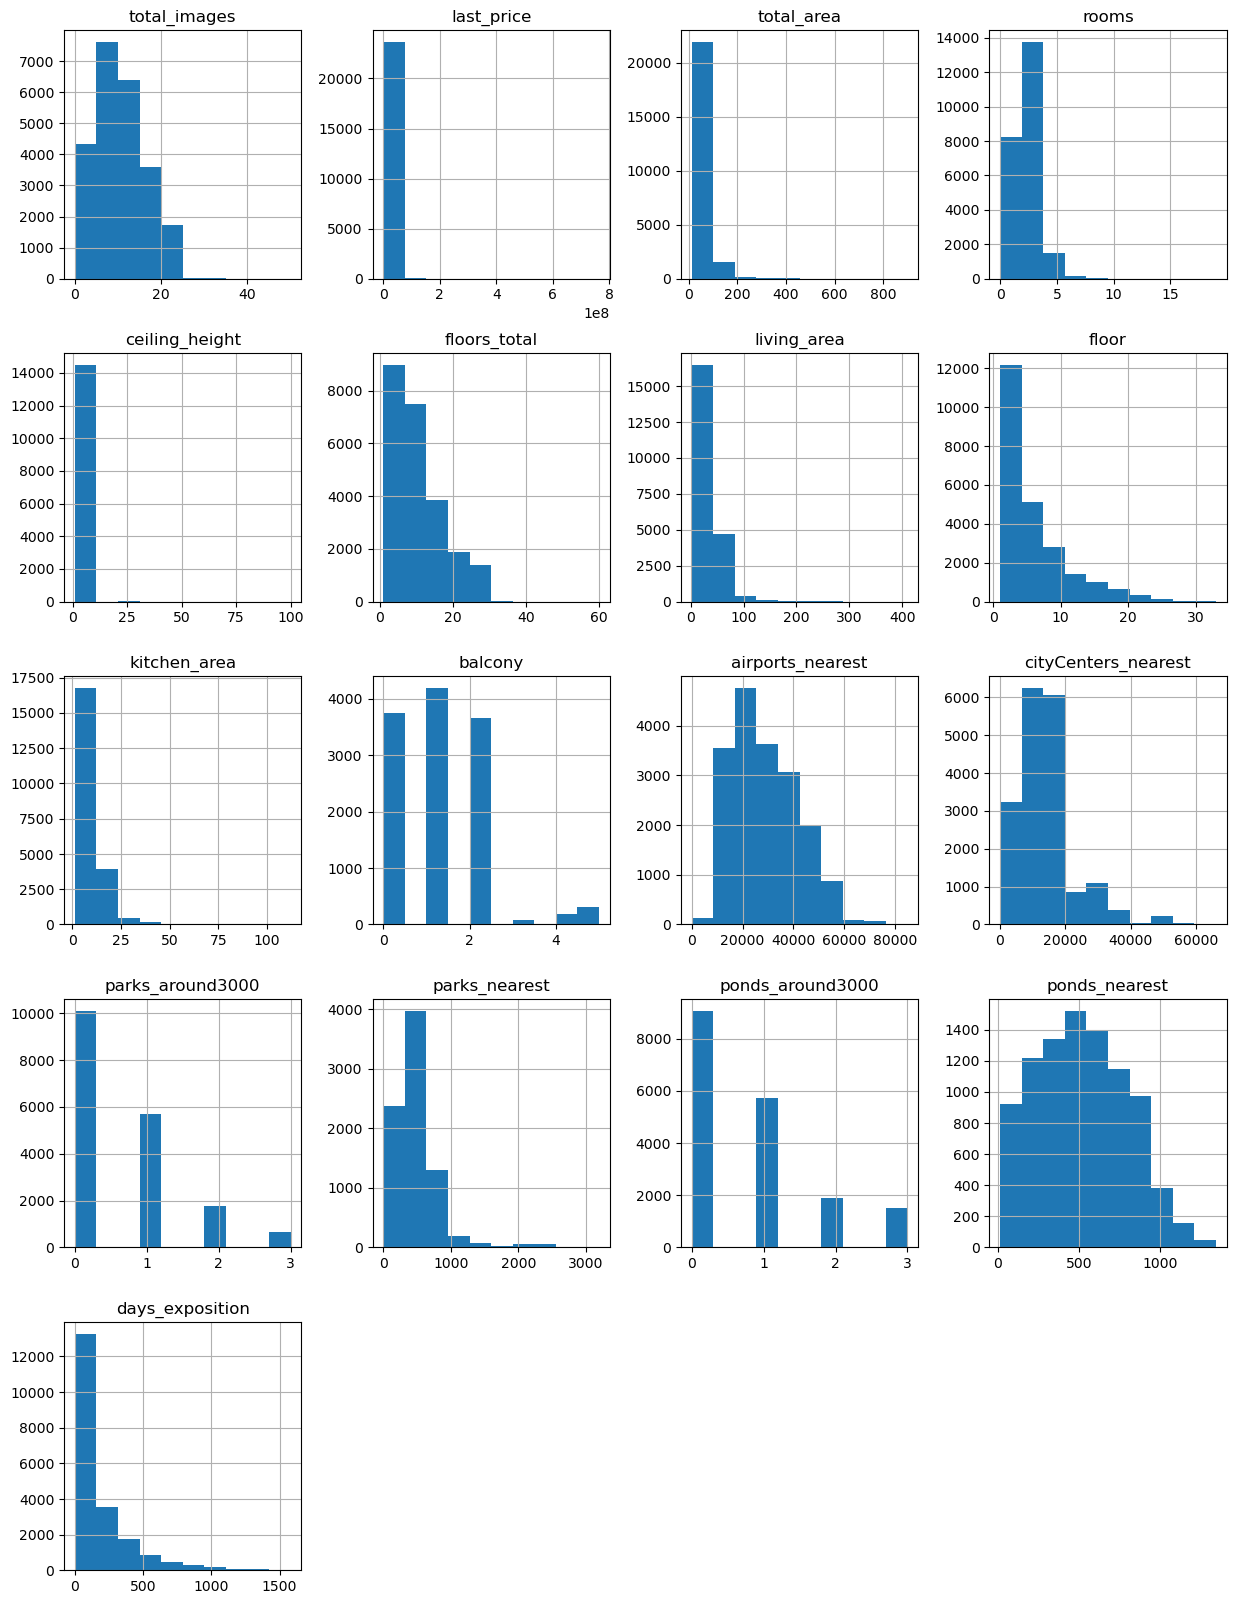

In [6]:
df.hist(figsize=(15, 20))
None

**ВЫВОД:** Видим большое количество пропусков.
Так же, не все типы данных сооттветсвуют верным значениям.
Пора приступать к предобработке данных, в которой мы приведем данные к рабочему состоянию.

### Предобработка данных

В данном блоке мы пройдем по каждому из столбцов в поиске и заполнении пропусков и аномальных значений. По итогу получим готовый к анализу датасет.

  - Первый столбец **total_images** — число фотографий квартиры в объявлении. Как мы можем видеть из предыдущего блока, в нем отсутсвуют пропуски. Приступим к аномальным значениям.

In [7]:
images_sort = df.sort_values(by='total_images')
images_sort['total_images'].unique()

array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
       17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 35,
       37, 39, 42, 50], dtype=int64)

Все значения похожи на правду, может быть и 0 фотографий и 50.

 - Переходим к следющему столбцу, **last_price** — цена на момент снятия с публикации. Изначально данные представлены в типе float, мы же их переведем в тип int.

In [8]:
df['last_price'] = df['last_price'].astype('int')
price_sort = df.sort_values(by='last_price')
price_sort['last_price'].unique()
price_sort['last_price']

8793         12190
17456       430000
14911       430000
16274       440000
17676       450000
           ...    
15651    300000000
1436     330000000
14706    401300000
19540    420000000
12971    763000000
Name: last_price, Length: 23699, dtype: int32

12190 руб. аномальная цена, мы ее заменим медианным значением.

In [9]:
all_price_median = df['last_price'].median()
df.loc[df['last_price'] == 12190] = df.loc[df['last_price'] == 12190].replace(12190, all_price_median)

 - Следующий **total_area** — общая площадь квартиры в квадратных метрах (м²).

In [10]:
images_sort = df.sort_values(by='total_area')
images_sort['total_area'].unique()

array([ 12. ,  13. ,  13.2, ..., 631. , 631.2, 900. ])

Данные подходят.

 - **first_day_exposition** — дата публикации объявления, удалим отсюда время, оставив только дату, так как время публикации нас не интересует, да и не указывается.

In [11]:
df['first_day_exposition'] = pd.to_datetime(df['first_day_exposition'], format='%Y-%m-%d')

 - **rooms** — число комнат. Пропусков нет, данные с правильным типом.

 - **ceiling_height** — высота потолков (м). Для начала избавимся от пропусков, заменив их на медианное значение.

In [12]:
df['ceiling_height'] = df['ceiling_height'].fillna(df['ceiling_height'].median())

In [13]:
df['ceiling_height'].describe()

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

Проверив медиану и среднее значение высоты потолков, можем сделать вывод, что аномальные значения почти не влияют на данные.

 - **floors_total** — всего этажей в доме. Меняем тип на int, избавляемся от пропусков и проверяем аномальные значения.

In [14]:
df['floors_total'] = df['floors_total'].fillna(df['floors_total'].median())
df['floors_total'] = df['floors_total'].astype(int)

In [15]:
df['floors_total'].describe()

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

 - **living_area** — жилая площадь в квадратных метрах (м²). Тут достаточно избавиться от пропусков.

In [16]:
df['living_area'] = df['living_area'].fillna(df['living_area'].median())

In [17]:
df['living_area'].describe()

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

 - **floor** — этаж. Пропусков нет, тип верный.

 - **is_apartment** — апартаменты (булев тип). 

In [18]:
df['is_apartment'] = df['is_apartment'].astype(bool)
df['is_apartment'] = df['is_apartment'].fillna(False)

  - **studio** — квартира-студия (булев тип) и **open_plan** — свободная планировка (булев тип). Пропусков нет, тип верный.

 - **kitchen_area** — площадь кухни в квадратных метрах (м²). Избавляемся от пропусков.

In [19]:
df['kitchen_area'] = df['kitchen_area'].fillna(df['kitchen_area'].median())

In [20]:
df['kitchen_area'].describe()

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

 - **balcony** — число балконов. Меняем пропуски на 0, также меняем тип на целые числа.

In [21]:
df['balcony'] = df['balcony'].fillna(0)
df['balcony'] = df['balcony'].astype('int')

 - **locality_name** — название населённого пункта. Пропуски заполним значением "Санкт-Петербург".

In [22]:
df['locality_name'] = df['locality_name'].fillna('Санкт-Петербург')

Проверим уникальные значения населенных пунктов.

In [23]:
df['locality_name'].unique()

array(['Санкт-Петербург', 'посёлок Шушары', 'городской посёлок Янино-1',
       'посёлок Парголово', 'посёлок Мурино', 'Ломоносов', 'Сертолово',
       'Петергоф', 'Пушкин', 'деревня Кудрово', 'Коммунар', 'Колпино',
       'поселок городского типа Красный Бор', 'Гатчина', 'поселок Мурино',
       'деревня Фёдоровское', 'Выборг', 'Кронштадт', 'Кировск',
       'деревня Новое Девяткино', 'посёлок Металлострой',
       'посёлок городского типа Лебяжье',
       'посёлок городского типа Сиверский', 'поселок Молодцово',
       'поселок городского типа Кузьмоловский',
       'садовое товарищество Новая Ропша', 'Павловск',
       'деревня Пикколово', 'Всеволожск', 'Волхов', 'Кингисепп',
       'Приозерск', 'Сестрорецк', 'деревня Куттузи', 'посёлок Аннино',
       'поселок городского типа Ефимовский', 'посёлок Плодовое',
       'деревня Заклинье', 'поселок Торковичи', 'поселок Первомайское',
       'Красное Село', 'посёлок Понтонный', 'Сясьстрой', 'деревня Старая',
       'деревня Лесколово', '

Упростим данные удалив из них "префиксы".

In [24]:
exclude_list = (
    ['посёлок ', 'городской ', 'деревня ', 'поселок ', 'городского ', 'типа ', 
     'садовое ', 'товарищество ', 'коттеджный ', 'село ', 'при ', 'железнодорожной '
     , 'станции ', 'садоводческое ', 'некоммерческое ' , 'имени ']
)
for rep in exclude_list:
    df['locality_name'] = df['locality_name'].str.replace(rep,'')
df['locality_name'].unique()  

array(['Санкт-Петербург', 'Шушары', 'Янино-1', 'Парголово', 'Мурино',
       'Ломоносов', 'Сертолово', 'Петергоф', 'Пушкин', 'Кудрово',
       'Коммунар', 'Колпино', 'Красный Бор', 'Гатчина', 'Фёдоровское',
       'Выборг', 'Кронштадт', 'Кировск', 'Новое Девяткино',
       'Металлострой', 'Лебяжье', 'Сиверский', 'Молодцово',
       'Кузьмоловский', 'Новая Ропша', 'Павловск', 'Пикколово',
       'Всеволожск', 'Волхов', 'Кингисепп', 'Приозерск', 'Сестрорецк',
       'Куттузи', 'Аннино', 'Ефимовский', 'Плодовое', 'Заклинье',
       'Торковичи', 'Первомайское', 'Красное Село', 'Понтонный',
       'Сясьстрой', 'Старая', 'Лесколово', 'Новый Свет', 'Сланцы',
       'Путилово', 'Ивангород', 'Шлиссельбург', 'Никольское',
       'Зеленогорск', 'Сосновый Бор', 'Оржицы', 'Кальтино', 'Романовка',
       'Бугры', 'Рощино', 'Кириши', 'Луга', 'Волосово', 'Отрадное',
       'Павлово', 'Оредеж', 'Копорье', 'Молодёжное', 'Тихвин', 'Победа',
       'Нурма', 'Синявино', 'Тосно', 'Стрельна', 'Бокситогорск',

 -  все оставшиеся стобцы, имеют пропуски, которые надо заполнить медианным значением и перевести тип в int:
   - **airports_nearest** — расстояние до ближайшего аэропорта в метрах (м)
   - **cityCenters_nearest** — расстояние до центра города (м)
   - **parks_around3000** — число парков в радиусе 3 км
   - **parks_nearest** — расстояние до ближайшего парка (м)
   - **ponds_around3000** — число водоёмов в радиусе 3 км
   - **ponds_nearest** — расстояние до ближайшего водоёма (м)
   - **days_exposition** — сколько дней было размещено объявление (от публикации до снятия)

In [25]:
df['airports_nearest'] = df['airports_nearest'].fillna(df['airports_nearest'].median())
df['airports_nearest'] = df['airports_nearest'].astype('int')

df['cityCenters_nearest'] = df['cityCenters_nearest'].fillna(df['cityCenters_nearest'].median())
df['cityCenters_nearest'] = df['cityCenters_nearest'].astype('int')

df['parks_around3000'] = df['parks_around3000'].fillna(0)
df['parks_around3000'] = df['parks_around3000'].astype('int')

df['parks_nearest'] = df['parks_nearest'].fillna(df['ponds_nearest'].median())
df['parks_nearest'] = df['parks_nearest'].astype('int')

df['ponds_around3000'] = df['ponds_around3000'].fillna(0)
df['ponds_around3000'] = df['ponds_around3000'].astype('int')

df['ponds_nearest'] = df['ponds_nearest'].fillna(df['ponds_nearest'].median())
df['ponds_nearest'] = df['ponds_nearest'].astype('int')

df['days_exposition'] = df['days_exposition'].fillna(df['days_exposition'].median())
df['days_exposition'] = df['days_exposition'].astype('int')

Теперь достаточно проверить финальную информацию о датасете. При отсутсвии отклонений, предобработка данных завершена.

In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   total_images          23699 non-null  int64         
 1   last_price            23699 non-null  int32         
 2   total_area            23699 non-null  float64       
 3   first_day_exposition  23699 non-null  datetime64[ns]
 4   rooms                 23699 non-null  int64         
 5   ceiling_height        23699 non-null  float64       
 6   floors_total          23699 non-null  int32         
 7   living_area           23699 non-null  float64       
 8   floor                 23699 non-null  int64         
 9   is_apartment          23699 non-null  bool          
 10  studio                23699 non-null  bool          
 11  open_plan             23699 non-null  bool          
 12  kitchen_area          23699 non-null  float64       
 13  balcony         

**ВЫВОД:** мы провели полную предобработку данных, избавились от пропусков и привели датасет к рабочему виду.

### Посчитайте и добавьте в таблицу новые столбцы

Далее нам потребуется посчитать и добавить в таблицу следующие параметры:
- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

In [27]:
df['price_per_square_meter'] = df['last_price'] / df['total_area']
df['price_per_square_meter'] = df['price_per_square_meter'].astype('int')

df['weekday_of_sale'] = df['first_day_exposition'].dt.weekday

df['month_of_sale'] = df['first_day_exposition'].dt.month

df['year_of_sale'] = df['first_day_exposition'].dt.year

def floor_type(row):
    floors_total = row['floors_total']
    floor = row['floor']
    if floor == 1:
        return 'Первый'
    elif floor == floors_total:
        return 'Последний'
    else:
        return 'Другой'
     
df['floor_type'] = df.apply(floor_type, axis = 1)

df['city_center_km'] = df['cityCenters_nearest'] / 1000
df['city_center_km'] = df['city_center_km'].astype('int')

In [28]:
df.head(20)

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_of_sale,month_of_sale,year_of_sale,floor_type,city_center_km
0,20,13000000,108.00,2019-03-07,3,2.70,16,51.00,8,True,False,False,25.00,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,3,2019,Другой,16
1,7,3350000,40.40,2018-12-04,1,2.65,11,18.60,1,True,False,False,11.00,2,Шушары,12817,18603,0,502,0,502,81,82920,1,12,2018,Первый,18
2,10,5196000,56.00,2015-08-20,2,2.65,5,34.30,4,True,False,False,8.30,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3,8,2015,Другой,13
3,0,64900000,159.00,2015-07-24,3,2.65,14,30.00,9,True,False,False,9.10,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,Другой,6
4,2,10000000,100.00,2018-06-19,2,3.03,14,32.00,13,True,False,False,41.00,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,Другой,8
5,10,2890000,30.40,2018-09-10,1,2.65,12,14.40,5,True,False,False,9.10,0,Янино-1,26726,13098,0,502,0,502,55,95065,0,9,2018,Другой,13
6,6,3700000,37.30,2017-11-02,1,2.65,26,10.60,6,True,False,False,14.40,1,Парголово,52996,19143,0,502,0,502,155,99195,3,11,2017,Другой,19
7,5,7915000,71.60,2019-04-18,2,2.65,24,30.00,22,True,False,False,18.90,2,Санкт-Петербург,23982,11634,0,502,0,502,95,110544,3,4,2019,Другой,11
8,20,2900000,33.16,2018-05-23,1,2.65,27,15.43,26,True,False,False,8.81,0,Мурино,26726,13098,0,502,0,502,189,87454,2,5,2018,Другой,13
9,18,5400000,61.00,2017-02-26,3,2.50,9,43.60,7,True,False,False,6.50,2,Санкт-Петербург,50898,15008,0,502,0,502,289,88524,6,2,2017,Другой,15


**ВЫВОД:** теперь у нас есть удобная и понятная таблица для проведения исследований. 

### Проведите исследовательский анализ данных

#### Приступаем к изучению данных, для начала построим графики и посмотрим на распределение по параметрам:
  - общая площадь;
  - жилая площадь;
  - площадь кухни;
  - цена объекта;
  - количество комнат;
  - высота потолков;
  - этаж квартиры;
  - тип этажа квартиры («первый», «последний», «другой»);
  - общее количество этажей в доме;
  - расстояние до центра города в метрах;
  - расстояние до ближайшего аэропорта;
  - расстояние до ближайшего парка;
  - день и месяц публикации объявления

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

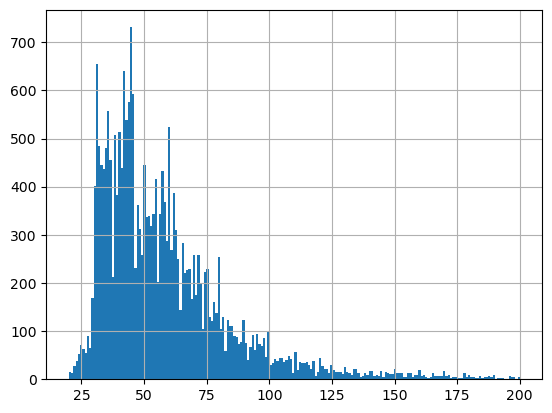

In [29]:
df['total_area'].hist(bins=200, range=(20, 200))
df['total_area'].describe()

**Из графика видно, что самое большое количество квартир имеют площадь между 30 кв.м. и 60 кв.м., среднее значение 52 кв.м.**

count    23699.000000
mean        34.099892
std         21.162096
min          2.000000
25%         19.000000
50%         30.000000
75%         41.100000
max        409.700000
Name: living_area, dtype: float64

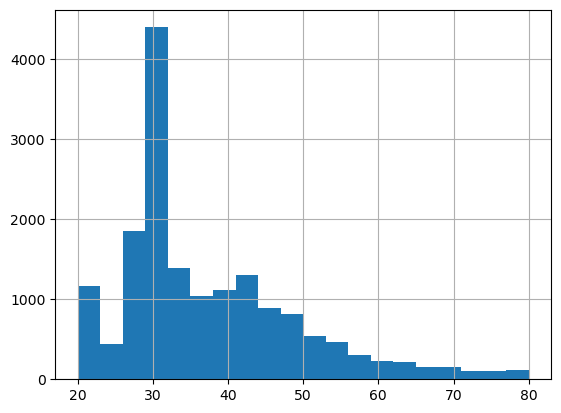

In [30]:
df['living_area'].hist(bins=20, range=(20, 80))
df['living_area'].describe()

**Основное количество квартир имеют жилую площадь от 25 до 50 кв.м., среднее значение 30 кв.м.**

count    23699.000000
mean        10.428526
std          5.631126
min          1.300000
25%          7.400000
50%          9.100000
75%         11.440000
max        112.000000
Name: kitchen_area, dtype: float64

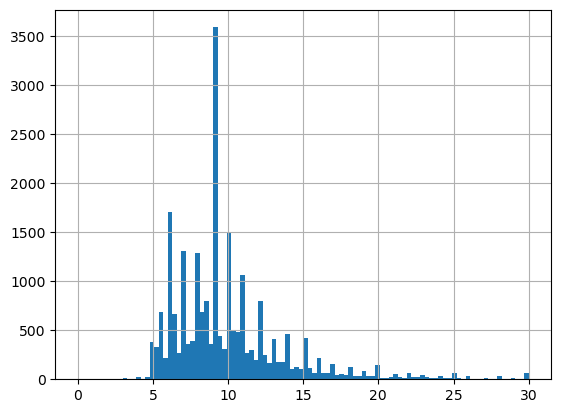

In [31]:
df['kitchen_area'].hist(bins=100, range=(0, 30))
df['kitchen_area'].describe()

**Основное количество квартир имеют площадь кухни от 5 до 15 кв.м., среднее значение 9,1 кв.м.**

count    2.369900e+04
mean     6.541744e+06
std      1.088694e+07
min      4.300000e+05
25%      3.400000e+06
50%      4.650000e+06
75%      6.800000e+06
max      7.630000e+08
Name: last_price, dtype: float64

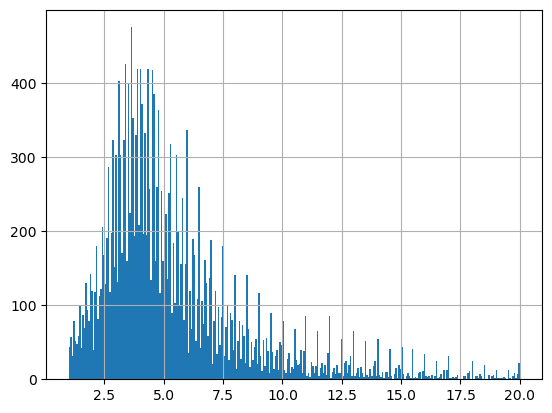

In [32]:
(df['last_price']/1000000).hist(bins=300, range=(1,20))
(df['last_price']).describe()

**Средняя цена квартиры в СПб и Лен. области составляет 4,65 млн.руб., а основная масса объявлений находится в промежутке 2,5 млн.руб - 7 млн.руб.**

count    23699.000000
mean         2.070636
std          1.078405
min          0.000000
25%          1.000000
50%          2.000000
75%          3.000000
max         19.000000
Name: rooms, dtype: float64

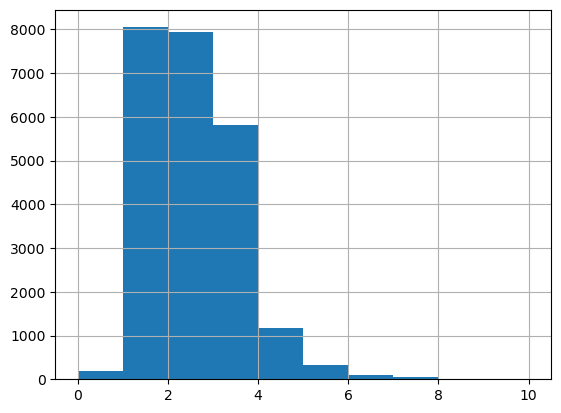

In [33]:
df['rooms'].hist(bins=10, range=(0, 10))
df['rooms'].describe()

**Средняя квартира имеет 2 комнаты**

count    23699.000000
mean         2.724358
std          0.988298
min          1.000000
25%          2.600000
50%          2.650000
75%          2.700000
max        100.000000
Name: ceiling_height, dtype: float64

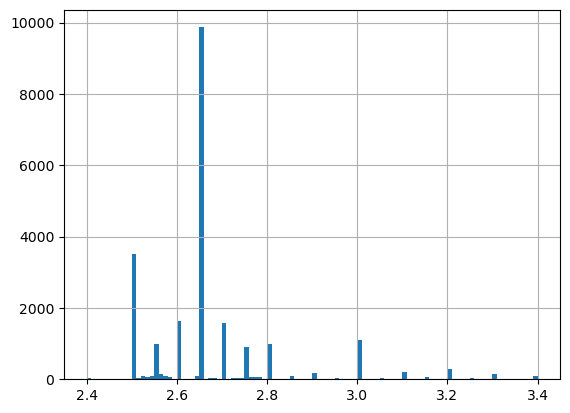

In [34]:
df['ceiling_height'].hist(bins=100, range=(2.4, 3.4))
df['ceiling_height'].describe()

**Основное распределение высоты потолков находится в пределах 2.5 метров и 3 метров, среднее значение 2.65 метра.**

count    23699.000000
mean         5.892358
std          4.885249
min          1.000000
25%          2.000000
50%          4.000000
75%          8.000000
max         33.000000
Name: floor, dtype: float64

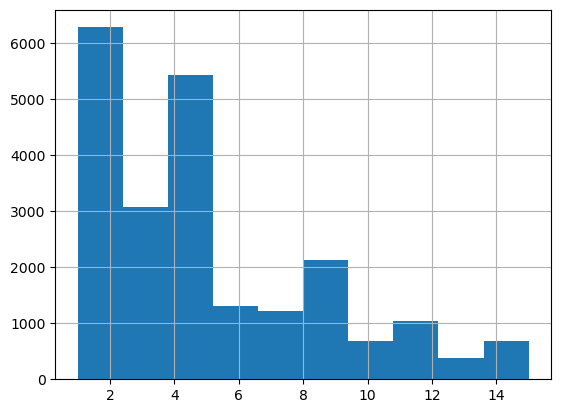

In [35]:
df['floor'].hist(range=(1, 15))
df['floor'].describe()

**Основное распределение значения этажа квартиры находится между 1 и 5 этажами, среднее значение 4 этаж.**

,count
floor_type,
Другой,17441
Первый,2917
Последний,3341


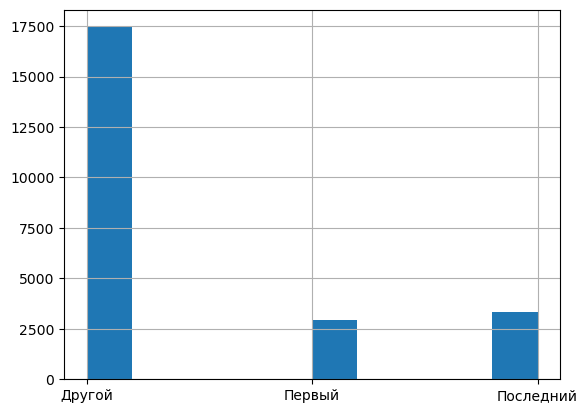

In [36]:
df['floor_type'].hist()
df.groupby('floor_type')['floor_type'].agg(['count'])

**Квартиры в продаже, в основном находятся не на первом и не на последнем этаже.**

count    23699.000000
mean        10.667750
std          6.585961
min          1.000000
25%          5.000000
50%          9.000000
75%         16.000000
max         60.000000
Name: floors_total, dtype: float64

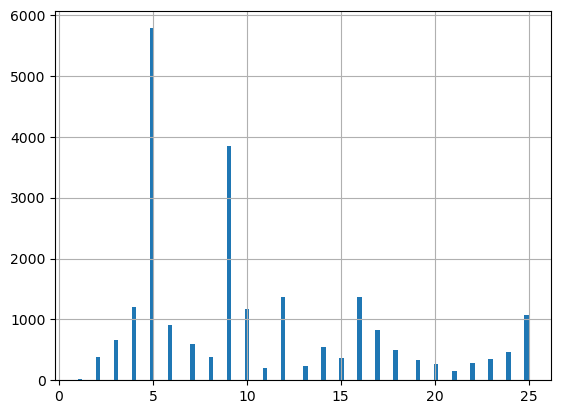

In [37]:
df['floors_total'].hist(bins=100, range=(1, 25))
df['floors_total'].describe()

**В основном квартиры находятся в домах с 5 - 9 этажами, средний показатель 9 этаж.**

count    23699.000000
mean     13936.676358
std       7553.792559
min        181.000000
25%      10927.000000
50%      13098.000000
75%      15248.500000
max      65968.000000
Name: cityCenters_nearest, dtype: float64

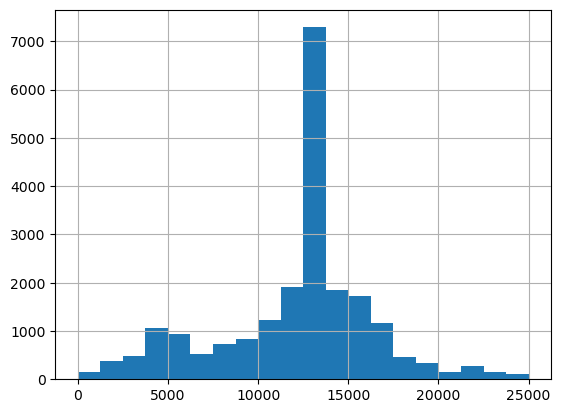

In [38]:
df['cityCenters_nearest'].hist(bins=20, range=(0, 25000))
df['cityCenters_nearest'].describe()

**Среднее удаление от центра - 13098 метров, основное распределение в пределах 10000 - 17500 метров.**

count    23699.000000
mean     28310.148023
std      11090.330161
min          0.000000
25%      21183.000000
50%      26726.000000
75%      34327.000000
max      84869.000000
Name: airports_nearest, dtype: float64

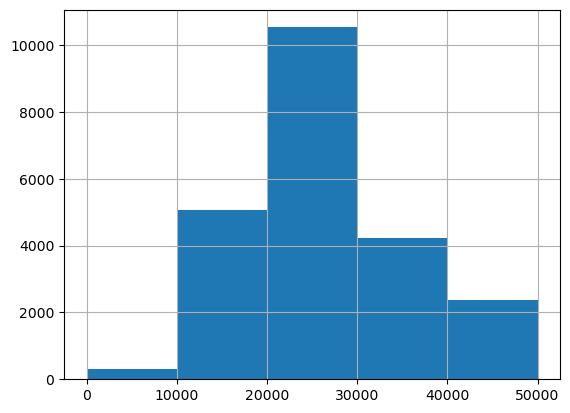

In [39]:
df['airports_nearest'].hist(bins=5, range=(0, 50000))
df['airports_nearest'].describe()

**Среднее удаление от аэропорта - 26726 метров, основное распределение в пределах 10000 - 40000 метров.**

count    23699.000000
mean       498.183468
std        199.930409
min          1.000000
25%        502.000000
50%        502.000000
75%        502.000000
max       3190.000000
Name: parks_nearest, dtype: float64

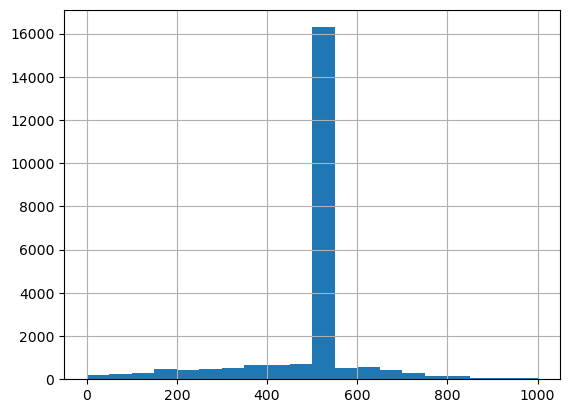

In [40]:
df['parks_nearest'].hist(bins=20, range=(0, 1000))
df['parks_nearest'].describe()

**Среднее расстояние до ближайшего парка - 455 метров, основное распределение в пределах 200 - 600 метров.**

,count
weekday_of_sale,
0,3612
1,4183
2,3974
3,4295
4,4000
5,1936
6,1699


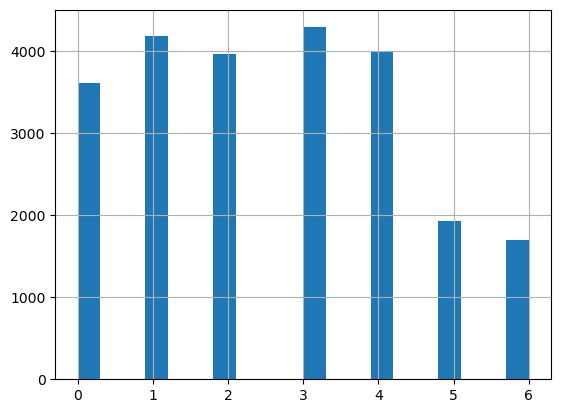

In [41]:
df['weekday_of_sale'].hist(bins=20, range=(0, 6))
df.groupby('weekday_of_sale')['weekday_of_sale'].agg(['count'])

**Чаще всего продажа происходит в четверг, реже всего в воскресенье.**

,count
month_of_sale,
1,1500
2,2640
3,2587
4,2379
5,1274
6,1760
7,1695
8,1744
9,1981


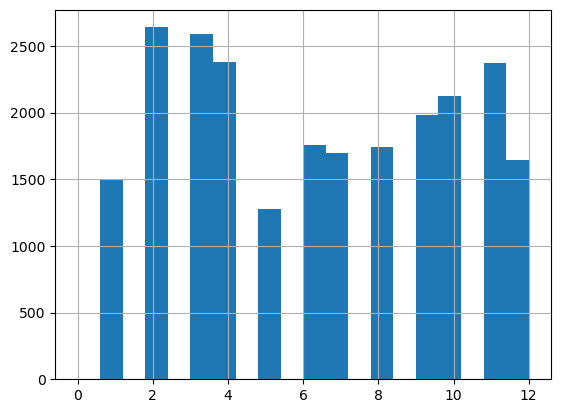

In [42]:
df['month_of_sale'].hist(bins=20, range=(0, 12))
df.groupby('month_of_sale')['month_of_sale'].agg(['count'])

**Чаще всего продажа происходит в феврале, реже всего в мае.**

**Вывод:** основываясь на полученных данных, среднестатистическая квартира:
 - находится в Санкт-Петербурге
 - двухкомнатная, общей площадью 52 кв.м., с жилой 30 кв.м. и кухней 9 кв.м.
 - стоимостью 4.65 млн. руб.
 - с высотой потолков 2.65 метра
 - находится на 4 этаже в 9-ти этажном доме
 - в 13 км. от центра города и в 27 от аэропорта
 - в пешей доступности (455 метров) есть парк

#### Проведем исследование, как быстро продавались квартиры.

In [43]:
display(df.groupby('days_exposition')['days_exposition'].agg(['count'])\
    .sort_values(by=('count'), ascending = False)[:10])

,count
days_exposition,
95,3245
45,880
60,538
7,234
30,208
90,204
4,176
3,158
5,152


Явно выбиваются показатели в 95, 45 и 60. Скорее всего это автоматическое закрытие объявления. Избавимся от этих данных.

In [44]:
new_df = df.query('days_exposition != 95 and days_exposition != 45 and days_exposition != 60 and days_exposition != 0')

count    19036.000000
mean       190.875867
std        225.051222
min          1.000000
25%         42.000000
50%        108.500000
75%        250.250000
max       1580.000000
Name: days_exposition, dtype: float64

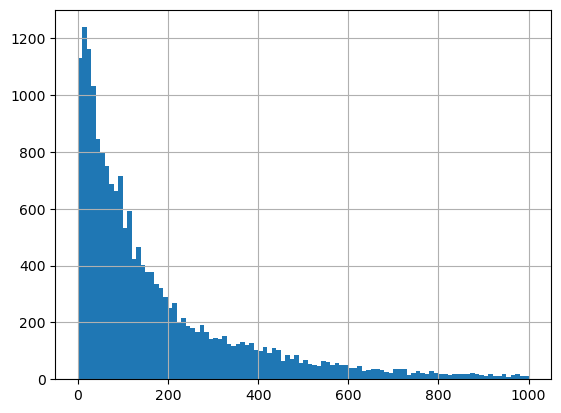

In [45]:
new_df['days_exposition'].hist(bins=100, range=(0, 1000))
new_df['days_exposition'].describe()

Теперь посчитаем медиану и средний показатель по времени продажи.

In [46]:
print(f'Среднее время продажи:', round(new_df['days_exposition'].mean()), 'дней')
print(f'Медианный показатель времени продажи:', round(new_df['days_exposition'].median()), 'дней')

Среднее время продажи: 191 дней
Медианный показатель времени продажи: 108 дней


**Вывод:** Судя по полученным данным, можно сделать вывод, что продажи до 150-200 дней, это быстрые продажи. В свою очередь, продажи свыше 200 дней можно считать долгими.

#### Исследование на тему: "Какие факторы больше всего влияют на общую (полную) стоимость объекта?"

Построим графики, которые покажут зависимость цены от следующих параметров:
 - общей площади;
 - жилой площади;
 - площади кухни;
 - количество комнат;
 - типа этажа, на котором расположена квартира (первый, последний, другой);
 - даты размещения (день недели, месяц, год);

0.6537041315713309

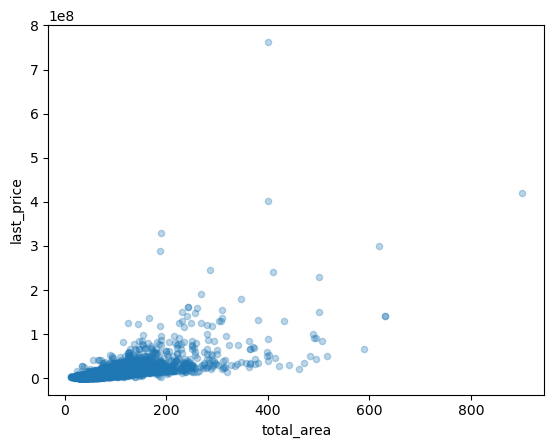

In [47]:
df.plot(x='total_area', y='last_price', kind='scatter', alpha=0.3) 
df['total_area'].corr(df['last_price'])

**Корреляция составляет 0.65, что говорит о наличие связи между общей площадью и ценой квартиры, но не сильной.**

0.5406608165656738

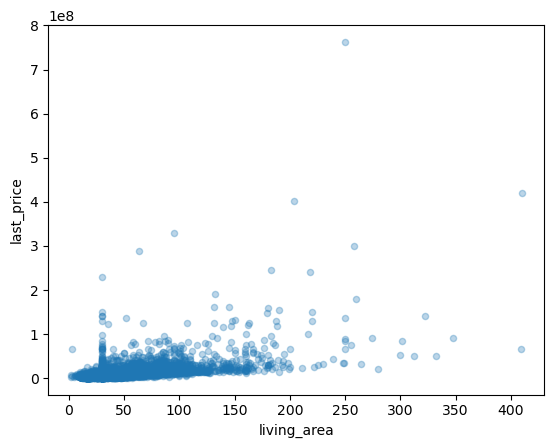

In [48]:
df.plot(x='living_area', y='last_price', kind='scatter', alpha=0.3) 
df['living_area'].corr(df['last_price'])

**Корреляция составляет 0.54, наличие связи между жилой площадью и ценой квартиры, есть, но слабая.**

0.44041467005058454

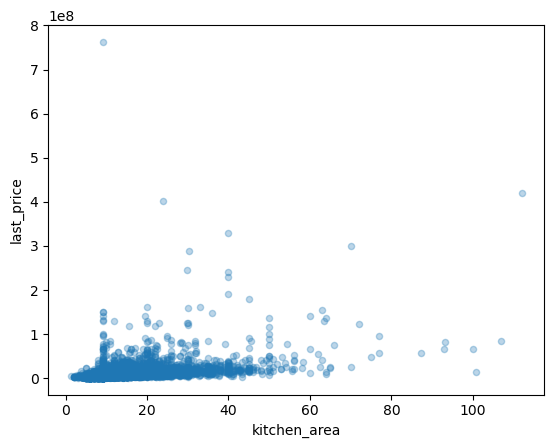

In [49]:
df.plot(x='kitchen_area', y='last_price', kind='scatter', alpha=0.3) 
df['kitchen_area'].corr(df['last_price'])

**Корреляция составляет 0.44, наличие связи между площадью кухни и ценой квартиры, есть, но слабая.**

0.3633441985853404

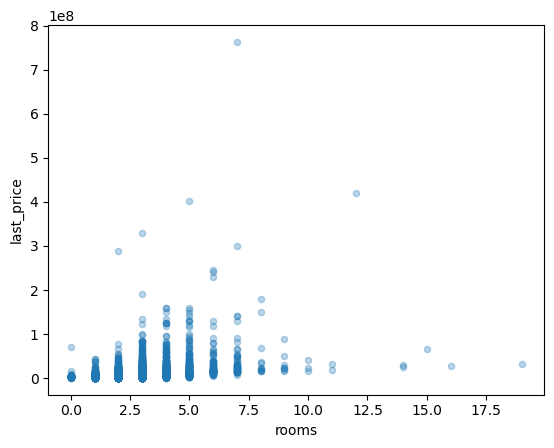

In [50]:
df.plot(x='rooms', y='last_price', kind='scatter', alpha=0.3) 
df['rooms'].corr(df['last_price'])

In [51]:
df.groupby('rooms')['last_price'].agg(['mean', 'count', 'median'])

,mean,count,median
rooms,,,
0,3.337724e+06,197,2700000.0
1,3.835362e+06,8047,3600000.0
2,5.592189e+06,7940,4770169.0
3,8.179119e+06,5814,6200000.0
4,1.342350e+07,1180,9000000.0
5,2.376208e+07,326,14000000.0
6,3.170975e+07,105,19000000.0
7,5.147007e+07,59,24900000.0
8,5.022417e+07,12,23095000.0


**Корреялция очень слабая - 0.36, однако, судя по медианному значению, зависимость между количеством комнат и ценой квартиры прямая (до 7-ми комнат идет повышение цены, квартиры с 8 и больше комнатами, представляют слишком малое кколичество из общей выборки).**

,mean,count,median
floor_type,,,
Другой,6.676061e+06,17441,4850000.0
Первый,4.803560e+06,2917,3900000.0
Последний,7.358165e+06,3341,4300000.0


<AxesSubplot:xlabel='floor_type'>

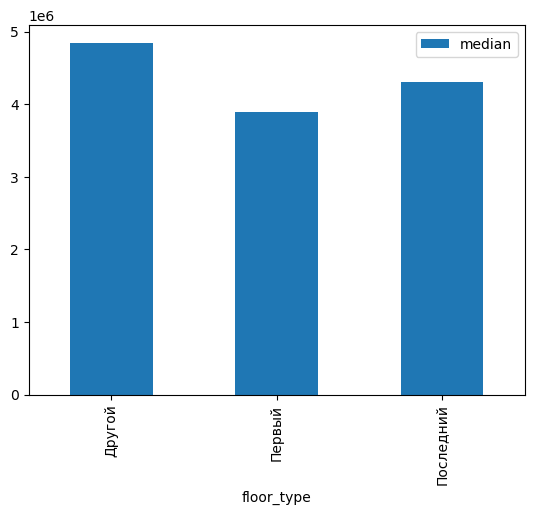

In [52]:
floor_grouped = df.groupby('floor_type')['last_price'].agg(['mean', 'count', 'median'])
display(floor_grouped)
floor_grouped.loc[:, ['median']].plot.bar()

**Квартиры на первом и последнем этаже дешевле всех остальных этажей, наблюдается прямая зависимость**

,median
weekday_of_sale,
0,4650000.0
1,4730000.0
2,4700000.0
3,4650000.0
4,4585000.0
5,4555000.0
6,4550000.0


,median
month_of_sale,
1,4600000.0
2,4650000.0
3,4650000.0
4,4800000.0
5,4515000.0
6,4400000.0
7,4650000.0
8,4570000.0
9,4700000.0


,median
year_of_sale,
2014,7700000.0
2015,5350000.0
2016,4550000.0
2017,4500000.0
2018,4550000.0
2019,5050000.0


<AxesSubplot:xlabel='year_of_sale'>

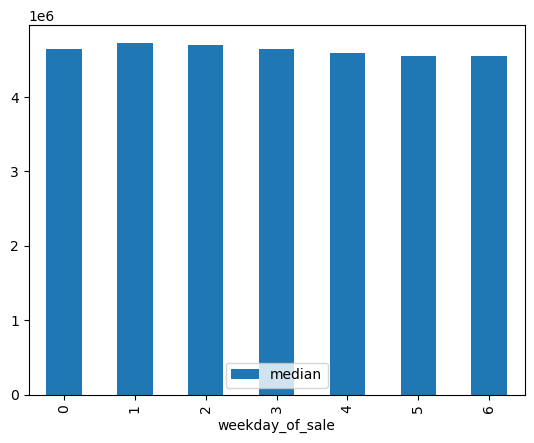

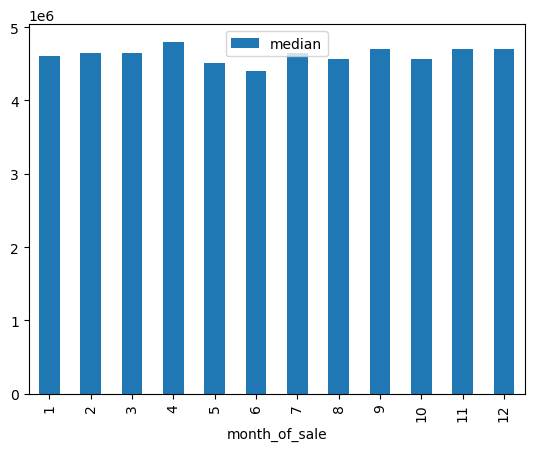

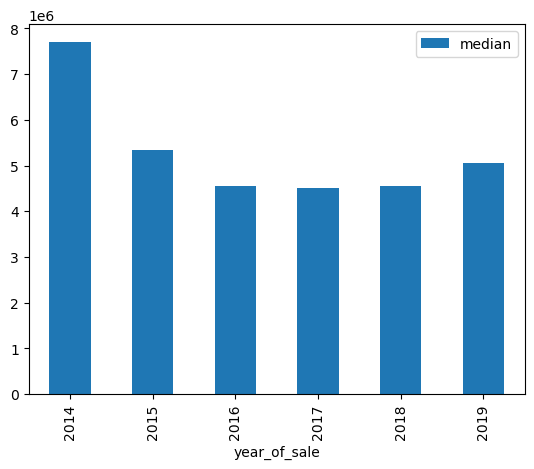

In [53]:
day_grouped = df.groupby('weekday_of_sale')['last_price'].agg(['median'])
display(day_grouped)
day_grouped.plot.bar()

month_grouped = df.groupby('month_of_sale')['last_price'].agg(['median'])
display(month_grouped)
month_grouped.plot.bar()

year_grouped = df.groupby('year_of_sale')['last_price'].agg(['median'])
display(year_grouped)
year_grouped.plot.bar()

**Судя по полученным данным, зависимости между днем, месяцем и годом продажи с ценой квартиры нет.**

**Вывод:** исходя из проведенного исследования, можно сделать вывод о наличии зависимости площади квартиры, жилой площади, количества комнат и этажа к общей стоимости квартиры. Чем выше один из параметтров, тем больше стоит жилье.

#### Посчитаем среднюю цену одного квадратного метра в 10 населённых пунктах с наибольшим числом объявлений, также выделю населённые пункты с самой высокой и низкой стоимостью квадратного метра.

Населенные пункты, с самым большим количеством объявлений:


,count,mean
locality_name,,
Санкт-Петербург,15770,114787.445339
Мурино,590,86087.055932
Кудрово,472,95324.476695
Шушары,440,78676.904545
Всеволожск,398,68654.007538
Пушкин,369,103125.373984
Колпино,338,75424.150888
Парголово,327,90175.489297
Гатчина,307,68745.693811


Населенный пункт, с самым низким средним значением по цене квадратного метра:


,count,mean
locality_name,,
Старополье,3,11206.0


Населенный пункт, с самым большим средним значением по цене квадратного метра:


,count,mean
locality_name,,
Зеленогорск,24,115122.5


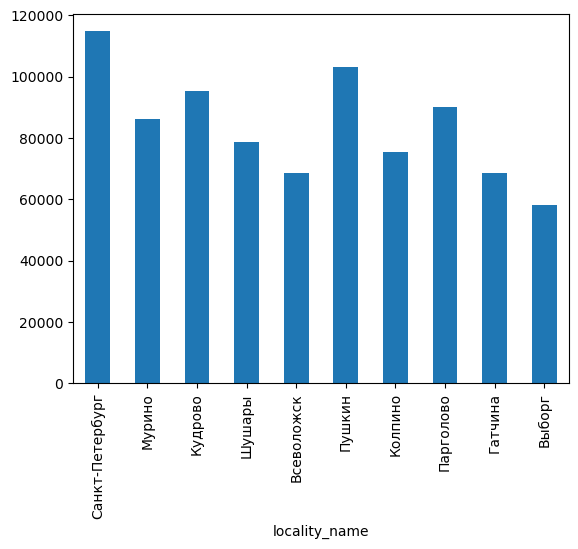

In [54]:
df_grouped_square_meter_count = df.groupby('locality_name')['price_per_square_meter'].agg(['count', 'mean'])\
    .sort_values(by=('count'), ascending = False)

df_grouped_square_meter_mean = df.groupby('locality_name')['price_per_square_meter'].agg(['count', 'mean'])\
    .sort_values(by=('mean'), ascending = False)

df_grouped_square_meter_count['mean'][:10].plot.bar()

print(f'Населенные пункты, с самым большим количеством объявлений:')
display(df_grouped_square_meter_count[:10])

print(f'Населенный пункт, с самым низким средним значением по цене квадратного метра:')
display(df_grouped_square_meter_mean[-1:])

print(f'Населенный пункт, с самым большим средним значением по цене квадратного метра:')
display(df_grouped_square_meter_mean[:1])

#### Выделим квартиры в Санкт-Петербурге и вычислим среднюю цену каждого километра. 

In [55]:
df_saint_p = df.query('locality_name == "Санкт-Петербург"')
df_saint_p.head()

,total_images,last_price,total_area,first_day_exposition,rooms,ceiling_height,floors_total,living_area,floor,is_apartment,studio,open_plan,kitchen_area,balcony,locality_name,airports_nearest,cityCenters_nearest,parks_around3000,parks_nearest,ponds_around3000,ponds_nearest,days_exposition,price_per_square_meter,weekday_of_sale,month_of_sale,year_of_sale,floor_type,city_center_km
0,20,13000000,108.0,2019-03-07,3,2.70,16,51.0,8,True,False,False,25.0,0,Санкт-Петербург,18863,16028,1,482,2,755,95,120370,3,3,2019,Другой,16
2,10,5196000,56.0,2015-08-20,2,2.65,5,34.3,4,True,False,False,8.3,0,Санкт-Петербург,21741,13933,1,90,2,574,558,92785,3,8,2015,Другой,13
3,0,64900000,159.0,2015-07-24,3,2.65,14,30.0,9,True,False,False,9.1,0,Санкт-Петербург,28098,6800,2,84,3,234,424,408176,4,7,2015,Другой,6
4,2,10000000,100.0,2018-06-19,2,3.03,14,32.0,13,True,False,False,41.0,0,Санкт-Петербург,31856,8098,2,112,1,48,121,100000,1,6,2018,Другой,8
7,5,7915000,71.6,2019-04-18,2,2.65,24,30.0,22,True,False,False,18.9,2,Санкт-Петербург,23982,11634,0,502,0,502,95,110544,3,4,2019,Другой,11


In [56]:
df_saint_p_grouped = df_saint_p.groupby('city_center_km')['last_price'].agg(['count', 'mean', 'median'])\
    .sort_values(by=('city_center_km'))
display(df_saint_p_grouped)

,count,mean,median
city_center_km,,,
0,86,2.344232e+07,11750000.0
1,242,1.884357e+07,10950000.0
2,307,1.616331e+07,9500000.0
3,530,1.340985e+07,8500000.0
4,916,1.357942e+07,9900000.0
5,770,1.529339e+07,8910131.0
6,470,1.438911e+07,8005000.0
7,407,1.279767e+07,7500000.0
8,676,8.418169e+06,6500000.0


<AxesSubplot:xlabel='city_center_km'>

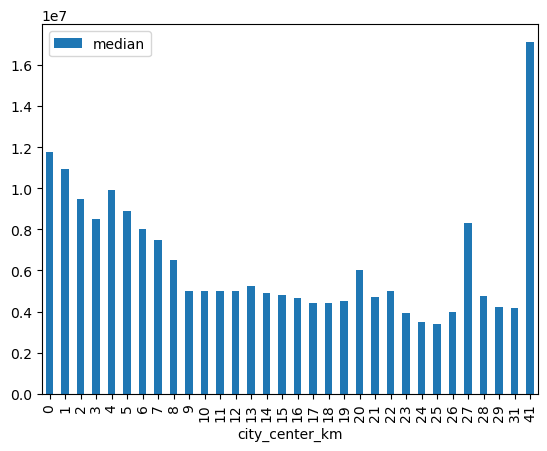

In [57]:
df_saint_p_grouped.loc[:, ['median']].plot.bar()

**Вывод:** в таблице видно среднее и медианное значение стоимости квартиры в зависимости от удаления от центра города, с увеличением расстояния, падает цена.

### Общий вывод

Мы провели большое исследование объявлений о продаже недвижимости в Санкт-Петербурге и пригороде. 

Для начала была проведена предобработка данных, с приведением датасета к рабочему виду. Замена пропущенных значений, избавление от аномальных данных в следующих категориях:

- высота потолков, пропущенные значения заменены на медианные
- общее количество этажей в доме, минимум пропусков, замена на медианное значение
- жилая площадь, пропущенные значения заменены на медианные
- апартаменты, пропущенные значения заменены на False (не апартаменты)
- площадь кухни, пропущенные значения заменены на медианные
- количество балконов, пропуски заменены 0
- название населенного пункта, минимальное количество пропусков, заменены на Санкт-Петербург
- расстояние до аэропорта, пропуски заменены медианным значением
- расстояние до центра города, пропуски заменены медианным значением
- количество парков в районе 3 км, пропуски заменены 0
- расстояние до ближайшего парка, пропуски заменены медианным значением
- число водоёмов в радиусе 3 км, пропуски заменены 0
- расстояние до ближайшего водоёма, пропуски заменены медианным значением
- сколько дней было размещено объявление (от публикации до снятия), пропуски заменены медианным значением

Для более удобной работы с данными посчитаны и добавлены в таблицу следующие параметры: 

- цена одного квадратного метра
- день публикации объявления (0 - понедельник, 1 - вторник и т.д.)
- месяц публикации объявления
- год публикации объявления
- тип этажа квартиры (значения — «первый», «последний», «другой»)
- расстояние в км до центра города

Все параметры изучены, описаны и к ним построены графики.

Изучая полученные данные, выявили среднестатистическую квартиру: это двухкомнатная квартира в Санкт-Петербурге с общей площадью 52 кв.м., стоимостью 4.65 млн. руб., которая находится на 4 этаже 9-ти этажного дома, в 13 км. от центра города и в 27 от аэропорта, также в пешей доступности есть парк.

Из полученных результатов, можно сделать вывод, что продажи до 150-200 дней, это быстрые продажи. В свою очередь, продажи свыше 200 дней можно считать долгими.
Среднее время продажи недвижимости в Санкт-Петербурге составляет 100 дней.

На общую стоимость объекта больше всего влияет площадь квартиры, жилая площади, количество комнат и этаж. Чем выше один из параметтров, тем больше стоит жилье.

Выявили наличие зависимости цены квартиры от площади, общей и жилой, также количества комнат и удаления от центра.

Самая дорогая недвижимость находится в Зеленогорске, а самая дешевая в Старополье. Самое большое количество объявлений приходится на Санкт-Петербург, Мурино, Кудрово, Шушары, Всеволожск, Пушкин, Колпино, Парголово, Гатчину и Выборг.

Также можно утверждать, что есть прямая зависимость между расстоянием от центра города и ценой объекта.